In [75]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massveto_calib_0614_calib_skim/'

base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg_no_const/'

base_file_loc = '/media/jykim/T7/storage/01_recon/v2_pre_omega_const_bkg/'
base_file_loc = '/media/jykim/T7/storage/Ntuples_ghi/Generic_Ntuples/massvetov2_pre_sel_study_1ab_bkg/'

phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_rho/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [102]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# # base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Belle2Pi0Veto_75MeV>0.023 '

# # base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV >0.023'
base_filter= 'D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526) < 0.15 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Dstarp_delM>0.140 && Dstarp_delM<0.16'
base_filter='abs(Rho_M - 0.77526 ) < 0.15 && Dstarp_CMS_p>2.5 && gamma_E>0.48 &&  Dstarp_D0_rest_frame_V_p>0.72 && Dstarp_D0_rest_frame_V_p<0.82 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && dM_pi0_75MeV>0.023'

variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Rho_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables +=['dM_pi0_75MeV']
# variables +=['Pi0_Prob']
variables += ['Dstarp_D0_rest_frame_gamma_p','Dstarp_M']


# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#               'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
ccbar_variables = variables + ['iCascDcyBrP_Dst_0']
tree='rho'

In [103]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)


# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=ccbar_variables)

pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [104]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [105]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [106]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

20447
20696
0.9879686896018555


In [57]:
# def cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair):
#     pd_ccbar_after = pd_ccbar.query(cut)
#     pd_uubar_after = pd_uubar.query(cut)
#     pd_ddbar_after = pd_ddbar.query(cut)
#     pd_ssbar_after = pd_ssbar.query(cut)
#     pd_charged_after = pd_charged.query(cut)
#     pd_mixed_after = pd_mixed.query(cut)
#     pd_taupair_after = pd_taupair.query(cut)

#     return pd_ccbar_after, pd_uubar_after , pd_ddbar_after , pd_ssbar_after , \
#         pd_charged_after , pd_mixed_after , pd_taupair_after

In [107]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0 & dM_pi0_75MeV>0.023 & abs(Dstarp_delM-(2.0103-1.8648))<0.002'
cut = 'gamma_E>0.0  & abs(Dstarp_delM-(2.0103-1.8648))<0.002 & Pi0_Prob<0.9'
cut = 'gamma_E>0'
# cut = 'Pi0_Prob<0.9'
# cut = 'rank==1'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[  45.   69.  102.  122.  173.  204.  236.  285.  291.  276.  377.  386.
  437.  482.  532.  609.  721.  810.  933. 1202. 1317. 1458. 1450. 1361.
 1040.  793.  581.  460.  368.  369.  386.  312.  283.  298.  259.  204.
  241.  193.  171.  149.  138.  114.   77.   93.   81.   67.   42.   40.
   25.   15.]
fitst_bin_entries=45.0


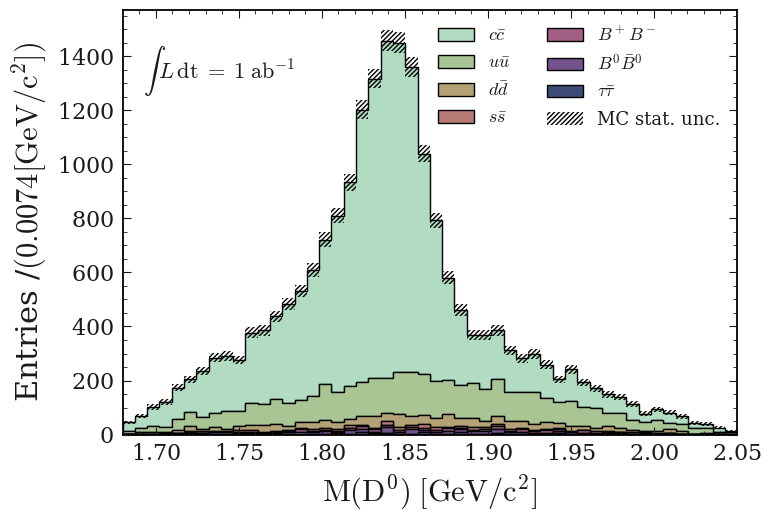

In [108]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[745. 667. 654. 625. 609. 654. 735. 768. 708. 686. 538. 482. 431. 369.
 356. 267. 287. 283. 280. 249. 244. 248. 228. 237. 202. 224. 178. 192.
 200. 221. 192. 226. 235. 228. 260. 244. 293. 300. 324. 358. 420. 489.
 500. 540. 526. 478. 544. 598. 553. 821.]
fitst_bin_entries=745.0


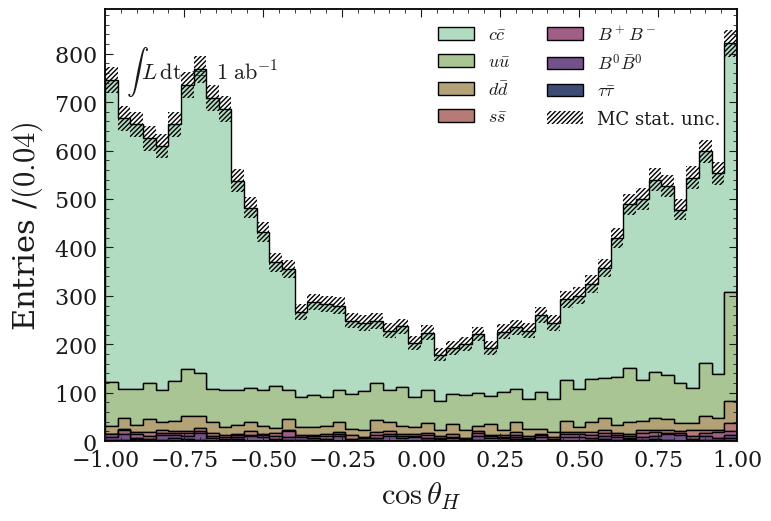

In [94]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_coshel.png")

[ 148.  170.  187.  230.  202.  248.  215.  302.  301.  305.  379.  373.
  417.  448.  559.  560.  651.  710.  861. 1019. 1071. 1139. 1112. 1117.
 1012.  773.  634.  496.  385.  349.  284.  283.  297.  293.  235.  215.
  238.  225.  185.  160.  178.  179.  130.  135.  115.  117.   86.   84.
   62.   68.]
fitst_bin_entries=148.0


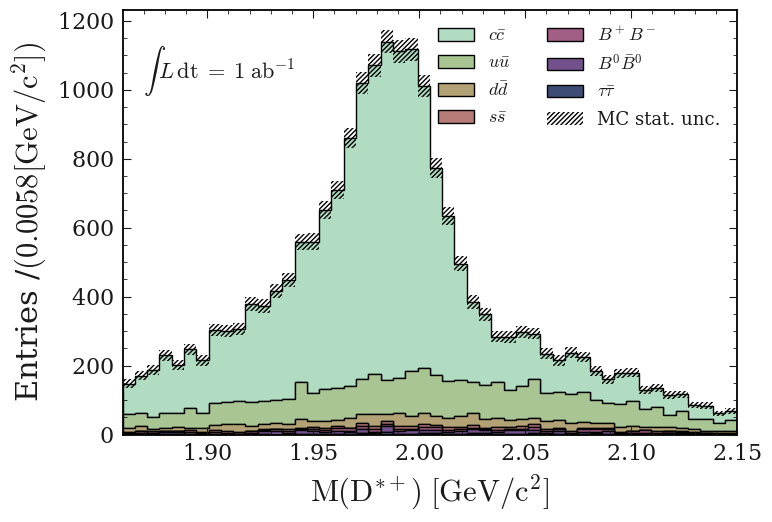

In [109]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
# xrange = (0.14,0.16)
xrange = (1.86,2.15)

nbins = 50
xlabel = "$\mathrm{M(D^{*+})}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 1042.
 5042. 6164. 5267. 3181.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]
fitst_bin_entries=0.0


TypeError: matplotlib.axes._base._AxesBase.set_xlim() argument after * must be an iterable, not type

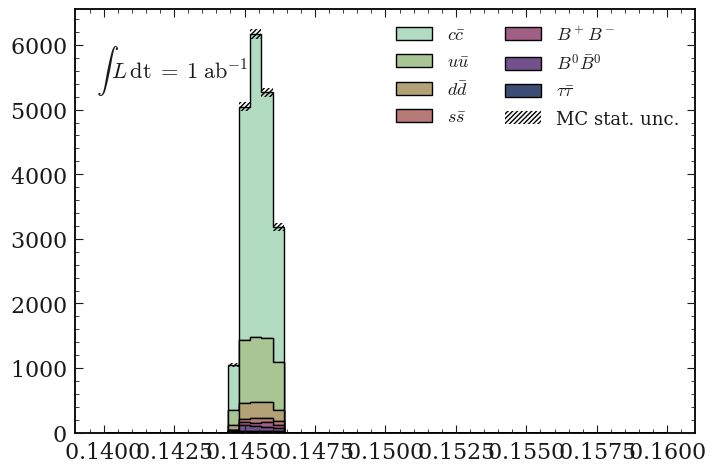

In [93]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (0.14,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[30870. 15736.  4770.  2335.  1485.]
fitst_bin_entries=30870.0


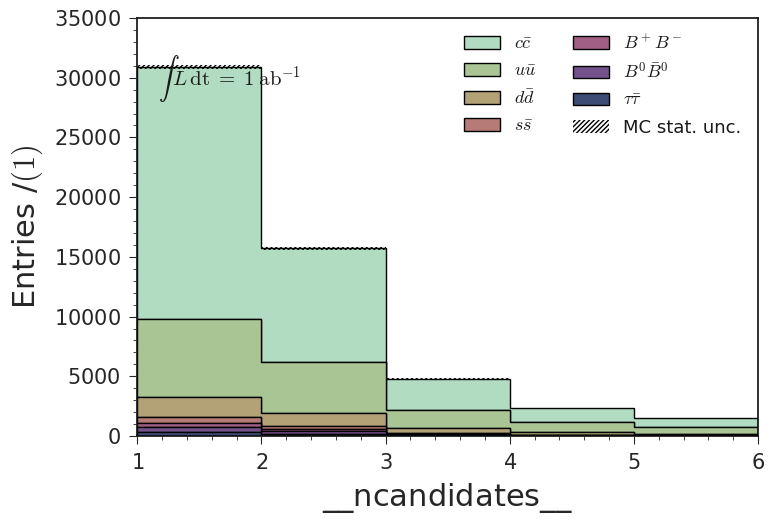

In [74]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_ncandidates.png")

[967. 821. 789. 741. 741. 754. 892. 869. 859. 784. 615. 508. 423. 365.
 352. 310. 297. 284. 263. 256. 267. 282. 279. 256. 253. 234. 217. 208.
 220. 234. 222. 240. 258. 239. 308. 259. 293. 304. 322. 358. 443. 521.
 547. 583. 588. 505. 604. 581. 583. 891.]
fitst_bin_entries=967.0


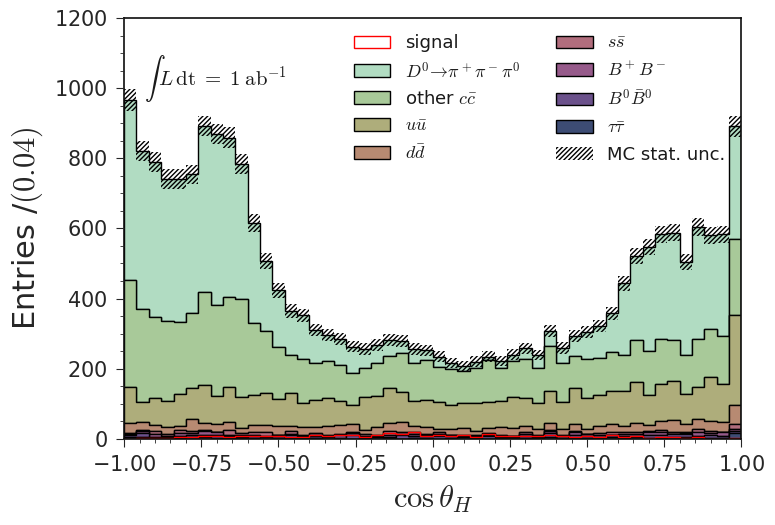

In [24]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$',r'other $c\bar{c}$',  r'$D^0 \to \pi^+ \pi^- \pi^0 $']

# data  = taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'

pd_ccbar_signal = pd_ccbar.query("iCascDcyBrP_Dst_0==16 ")
pd_ccbar_pi0 = pd_ccbar.query("iCascDcyBrP_Dst_0==0 ")
pd_ccbar_others = pd_ccbar.query("iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=16")
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var],pd_ccbar_others[var],  pd_ccbar_pi0[var]]  

# pd_ccbar_signal[var]

scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"
plt.hist(pd_ccbar_signal[var],bins=np.linspace(-1,1,51),histtype='step',color='red',label='signal')
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=2)

# plt.legend()
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/rhogamma/MC15ri/MC15ri_rhog_1ab_topo_coshel.png")


[ 534.  514.  552.  520.  534.  551.  537.  557.  501.  471.  536.  504.
  497.  543.  572.  598.  624.  694.  794. 1019. 1121. 1329. 1278. 1136.
  866.  603.  407.  283.  220.  233.  240.  231.  210.  226.  216.  218.
  205.  218.  175.  188.  203.  182.  179.  156.  177.  175.  160.  157.
  173.  172.]
fitst_bin_entries=534.0


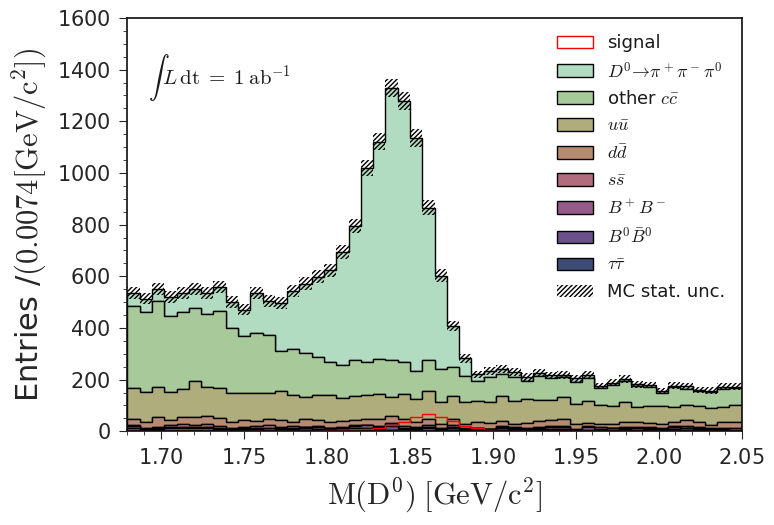

In [25]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$',r'other $c\bar{c}$',  r'$D^0 \to \pi^+ \pi^- \pi^0 $']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'

pd_ccbar_signal = pd_ccbar.query("iCascDcyBrP_Dst_0==16 ")
pd_ccbar_pi0 = pd_ccbar.query("iCascDcyBrP_Dst_0==0 ")
pd_ccbar_others = pd_ccbar.query("iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=16")
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var],pd_ccbar_others[var],  pd_ccbar_pi0[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"
plt.hist(pd_ccbar_signal[var],bins=np.linspace(1.68,2.05,51),histtype='step',color='red',label='signal')
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1)
plt.savefig("/media/jykim/T7/saved_plots/DRAW/rhogamma/MC15ri/MC15ri_rhog_1ab_topo.png")


In [49]:
len(pd_ccbar_others)

7810

In [50]:
pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts().nlargest(20)

 9     2242
-1     1176
 3      947
 7      404
 34     264
 5      230
 11     179
 32      79
 14      78
 13      65
 69      56
 21      54
 25      53
 62      53
 26      50
 4       50
 43      48
 2       44
 50      44
 15      43
Name: iCascDcyBrP_Dst_0, dtype: int64

In [51]:
pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[0]

9

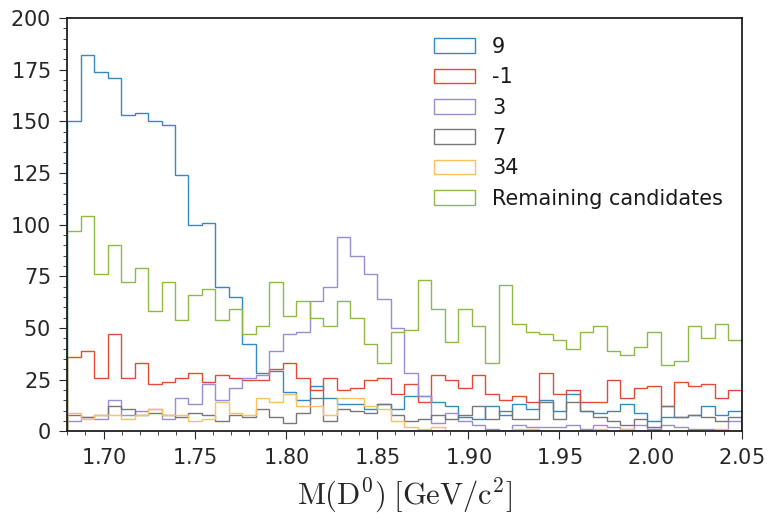

7810


In [58]:


# Assuming you have defined pd_ccbar_others DataFrame and other required variables

bkg_listing = pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts()

plotted_indices = set()  # To store indices that have been plotted

N_total = 0
for i in range(5):  # Loop from 0 to 5
    decay_chain = bkg_listing.index[i]
    df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'] == decay_chain]
    
    N_total += len(df)
    plt.hist(df.D0_M, bins=np.linspace(1.68, 2.05, 51), histtype='step', label=decay_chain)
    
    
    
    plotted_indices.add(decay_chain)

remaining_candidates = [decay_chain for decay_chain in bkg_listing.index if decay_chain not in plotted_indices]

if remaining_candidates:
    remaining_df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'].isin(remaining_candidates)]
    
    N_total += len(remaining_df)
    plt.hist(remaining_df.D0_M, bins=np.linspace(1.68, 2.05, 51), histtype='step', label='Remaining candidates')

plt.xlim(1.68, 2.05)
# plt.tight_layout()
plt.legend()
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_excpet_pi0eta.png")

plt.show()


print(N_total)

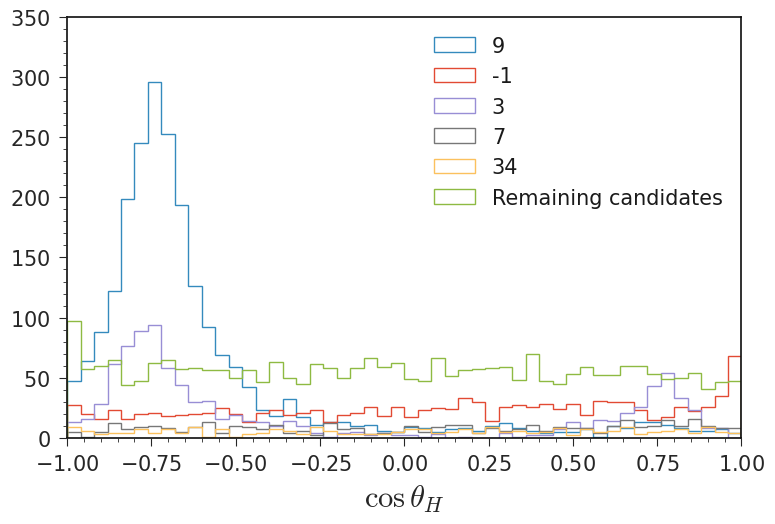

In [59]:

# Assuming you have defined pd_ccbar_others DataFrame and other required variables

bkg_listing = pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts()

plotted_indices = set()  # To store indices that have been plotted

for i in range(5):  # Loop from 0 to 5
    decay_chain = bkg_listing.index[i]
    df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'] == decay_chain]
    plt.hist(df.D0_cosHel_0, bins=np.linspace(-1,1, 51), histtype='step', label=decay_chain)
    plotted_indices.add(decay_chain)

remaining_candidates = [decay_chain for decay_chain in bkg_listing.index if decay_chain not in plotted_indices]

if remaining_candidates:
    remaining_df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'].isin(remaining_candidates)]
    plt.hist(remaining_df.D0_cosHel_0, bins=np.linspace(-1,1, 51), histtype='step', label='Remaining candidates')

plt.xlim(-1,1)
plt.legend()
plt.xlabel(r"$\cos\theta_H$")
plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_excpet_pi0eta_coshel.png")

plt.show()




